<a href="https://colab.research.google.com/github/Priscillebk/Apprendre-SQL-pour-debutant-Tutoriel-SQL-complet/blob/main/BANK_MARKETING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projet : Analyse exploiratoire de donnees pour une campagne marketing bancaire**

**Membres du Groupe:**

1.   MEDETON Jéhovanan Eunice P M
2.   NGASSAMA Bryand
3.   BERKIBARE Schékina Ketsia







# **1. Compréhension du contexte et des données**





#Analyse des objectifs stratégiques de la banque

###Objectif business:
La banque cherche à augmenter le taux de souscription aux dépôts à terme tout en réduisant les coûts des campagnes marketing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset
df = pd.read_csv('/content/bank-full.csv', sep=';')

# Aperçu des premières lignes
print(df.head())

# Vérification des types de colonnes (16 caractéristiques au total)
print(df.info())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

                age        balance      duration      campaign
count  45211.000000   45211.000000  45211.000000  45211.000000
mean      40.936210    1362.272058    258.163080      2.763841
std       10.618762    3044.765829    257.527812      3.098021
min       18.000000   -8019.000000      0.000000      1.000000
25%       33.000000      72.000000    103.000000      1.000000
50%       39.000000     448.000000    180.000000      2.000000
75%       48.000000    1428.000000    319.000000      3.000000
max       95.000000  102127.000000   4918.000000     63.000000


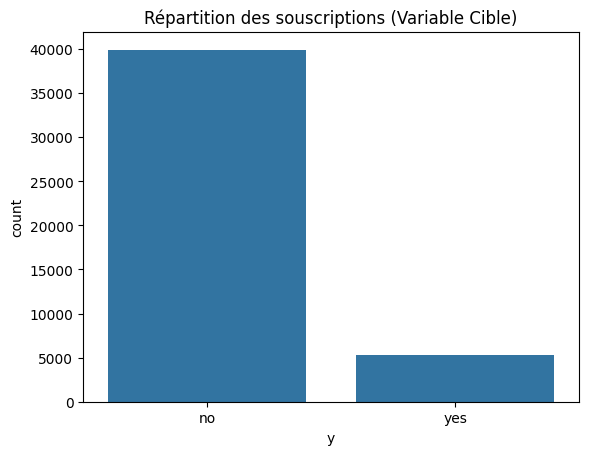

In [ ]:
# Statistiques pour les variables numériques
print(df[['age', 'balance', 'duration', 'campaign']].describe())

# Visualisation de la variable cible 'y' (Abonnement au dépôt)
sns.countplot(x='y', data=df)
plt.title('Répartition des souscriptions (Variable Cible)')
plt.show()

#**2. Préparation des données**

In [2]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrage des outliers
df_cleaned = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

In [3]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


###Aucune donnéé n'est manquante. Tout est bien rempli.

In [4]:
# Doublons

df.duplicated().sum()

np.int64(0)

Il n'y a pas de valuers manquantes

#**3. Analyses statistiques**

##**Analyse univariée**

                age        balance      duration      campaign
count  45211.000000   45211.000000  45211.000000  45211.000000
mean      40.936210    1362.272058    258.163080      2.763841
std       10.618762    3044.765829    257.527812      3.098021
min       18.000000   -8019.000000      0.000000      1.000000
25%       33.000000      72.000000    103.000000      1.000000
50%       39.000000     448.000000    180.000000      2.000000
75%       48.000000    1428.000000    319.000000      3.000000
max       95.000000  102127.000000   4918.000000     63.000000


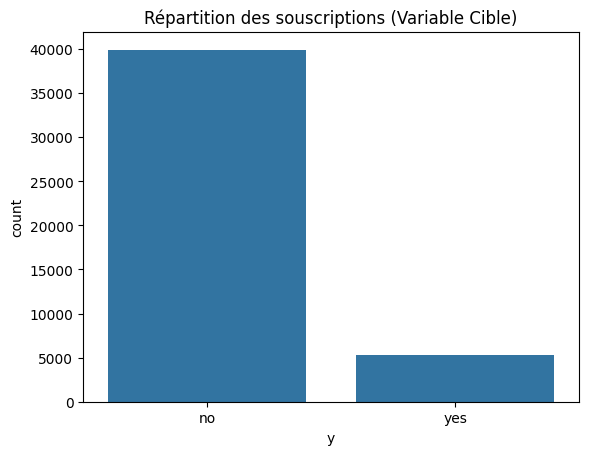

In [15]:
# Statistiques pour les variables numériques
print(df[['age', 'balance', 'duration', 'campaign']].describe())

# Visualisation de la variable cible 'y' (Abonnement au dépôt)
sns.countplot(x='y', data=df)
plt.title('Répartition des souscriptions (Variable Cible)')
plt.show()

In [5]:
quantivars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
quantivars

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
df[quantivars].mean()


,0
age,40.936210
balance,1362.272058
day,15.806419
duration,258.163080
campaign,2.763841
pdays,40.197828
previous,0.580323


###Ces résultats correspondent aux valeurs moyennes des variables quantitatives du jeu de données.

Les résultats montrent que les clients contactés ont en moyenne 41 ans et disposent d’un solde bancaire modéré. Les campagnes sont menées de façon régulière au cours du mois, avec des appels d’environ 4 minutes en moyenne. Chaque client est contacté près de trois fois par campagne, ce qui traduit une stratégie de relance modérée. La plupart des clients ont eu peu d’interactions lors de campagnes précédentes, suggérant un ciblage en grande partie orienté vers des clients peu sollicités.

In [ ]:
df[quantivars].std()

,0
age,10.618762
balance,3044.765829
day,8.322476
duration,257.527812
campaign,3.098021
pdays,100.128746
previous,2.303441


Les écarts-types indiquent une forte hétérogénéité entre les clients. L’âge est relativement dispersé autour de la moyenne, tandis que le solde bancaire présente une très forte variabilité, traduisant des situations financières très différentes. La durée des appels et le nombre de contacts par campagne varient également fortement selon les clients. En particulier, la variable pdays affiche une dispersion élevée, suggérant des stratégies de recontact très inégales. Cette variabilité justifie une segmentation fine de la clientèle et l’usage de méthodes statistiques et prédictives pour adapter la stratégie marketing.

In [ ]:
((df[quantivars].std() / df[quantivars].mean())*100).sort_values(ascending=False)

,0
previous,396.923707
pdays,249.089941
balance,223.506444
campaign,112.091154
duration,99.753928
day,52.652509
age,25.939778


###Interprétation

previous : très variable, certains clients ont été beaucoup contactés auparavant, la majorité peu ou pas.

pdays : forte dispersion, le temps depuis le dernier contact varie énormément.

balance : solde bancaire très hétérogène, certains clients ont peu d’épargne, d’autres beaucoup.

campaign et duration : nombre de contacts et durée des appels très variables, pouvant influencer la souscription.

age et day : relativement stables, peu de variation autour de la moyenne.

Conclusion : ces résultats montrent la nécessité d’une segmentation fine et justifient la normalisation des variables quantitatives avant modélisation.

In [ ]:
percentile_90 = df.balance.quantile(0.9)
pct_top10 = (df['balance'] > percentile_90).mean() * 100
print(f"{pct_top10:.2f}% des clients font partie des 10% ayant le plus d'épargne")



10.00% des clients font partie des 10% ayant le plus d'épargne


##Observer comment les clients “yes” et “no” diffèrent sur les variables quantitatives afin d’identifier des segments à fort potentiel.

In [ ]:
 #Moyennes et écarts-types par groupe y
group_stats = df.groupby('y')[quantivars].agg(['mean', 'std'])

# Affichage
print(group_stats)

           age                 balance                     day            \
          mean        std         mean          std       mean       std   
y                                                                          
no   40.838986  10.172662  1303.714969  2974.195473  15.892290  8.294728   
yes  41.670070  13.497781  1804.267915  3501.104777  15.158253  8.501875   

       duration              campaign                pdays              \
           mean         std      mean       std       mean         std   
y                                                                        
no   221.182806  207.383237  2.846350  3.212767  36.421372   96.757135   
yes  537.294574  392.525262  2.141047  1.921826  68.702968  118.822266   

     previous            
         mean       std  
y                        
no   0.502154  2.256771  
yes  1.170354  2.553272  


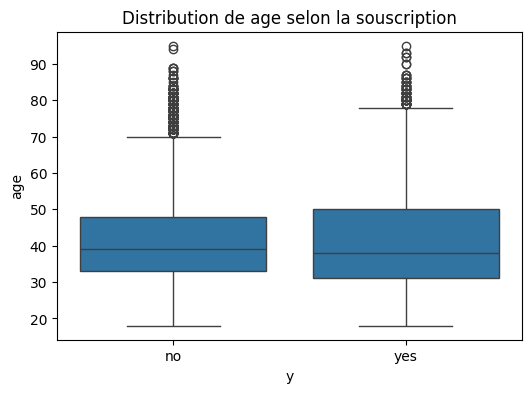

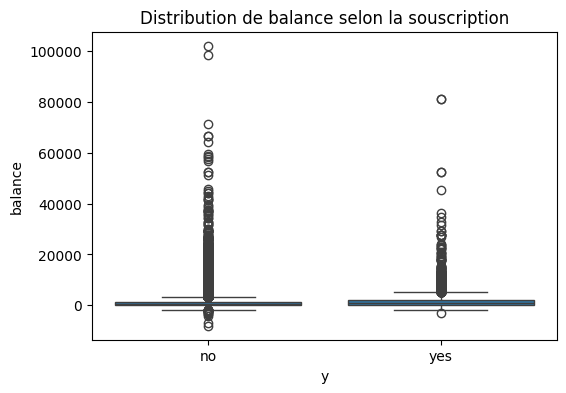

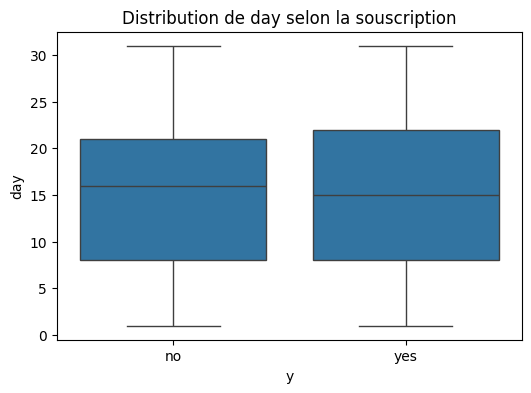

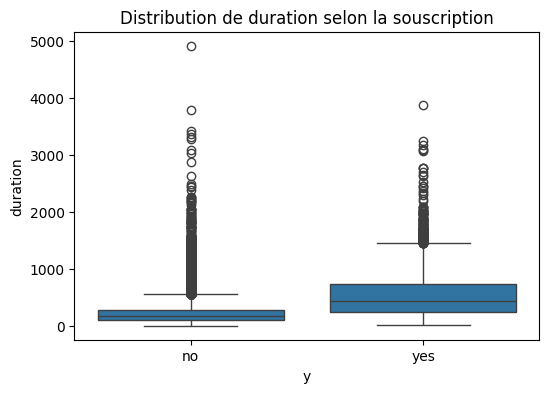

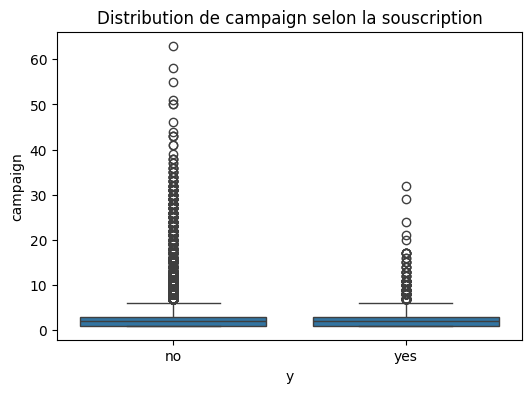

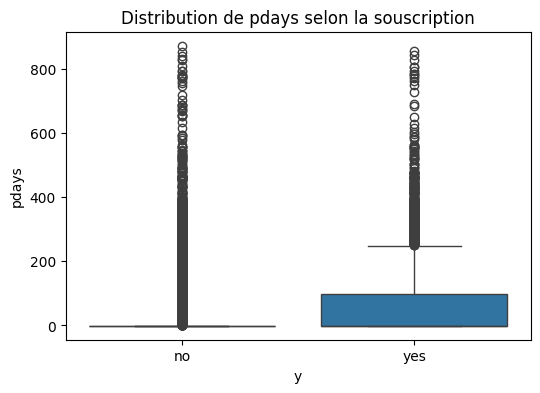

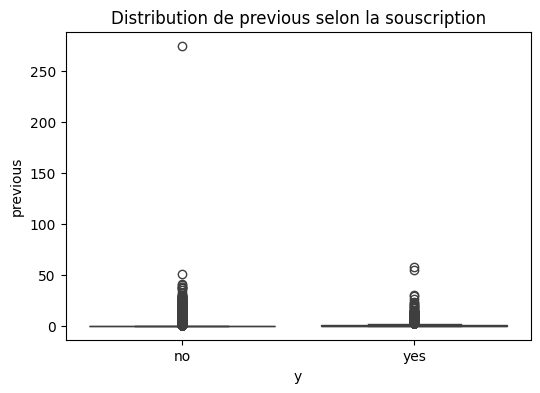

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in quantivars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f"Distribution de {col} selon la souscription")
    plt.show()


###Commentaires
Âge (age) : Les clients ayant accepté l’offre (“yes”) sont légèrement plus âgés en moyenne (≈41,7 ans vs 40,8 ans). La différence est faible, mais il y a plus de dispersion chez les “yes”.

Solde bancaire (balance) : Les clients “yes” ont un solde moyen plus élevé (≈1 804 vs 1 304), indiquant que les clients avec plus d’épargne sont plus susceptibles d’accepter.

Jour du contact (day) : Très similaire entre les deux groupes, donc le jour du mois n’a pas d’effet visible sur la souscription.

Durée de l’appel (duration) : Les clients “yes” ont des appels beaucoup plus longs en moyenne (≈537s vs 221s). La durée semble fortement liée à la souscription (mais attention : risque de data leakage).

Nombre de contacts pendant la campagne (campaign) : Légèrement plus faible pour les “yes”, ce qui pourrait indiquer que les clients moins sollicités répondent mieux.

Jours depuis dernier contact (pdays) : Les “yes” ont un pdays plus élevé (≈69 vs 36), suggérant que certains clients ont été recontactés après plus longtemps et ont mieux répondu.

Contacts précédents (previous) : Les “yes” ont eu plus de contacts lors de campagnes passées (≈1,17 vs 0,50), ce qui montre qu’un historique d’interactions peut augmenter la probabilité d’acceptation.

###Interpétation

L’analyse des variables quantitatives par groupe montre que les clients ayant accepté l’offre sont légèrement plus âgés et disposent d’un solde bancaire moyen plus élevé. Ils ont également un historique de contacts plus riche et des appels plus longs, tandis que le nombre de contacts pendant la campagne et le jour du contact n’influencent que faiblement la souscription. Ces résultats suggèrent que les clients avec plus d’épargne, un historique d’interactions et un engagement plus important sont les segments à privilégier pour les campagnes futures.

##Analyse de l'asymétrie et aplatissement des variables quantitatives

In [ ]:
skewness = df[quantivars].skew()
kurtosis = df[quantivars].kurt()

# Afficher seulement celles avec skewness ou kurtosis importantes
print("Variables avec skewness > 1 ou < -1 :\n", skewness[abs(skewness) > 1])
print("\nVariables avec kurtosis > 5 :\n", kurtosis[kurtosis > 5])


Variables avec skewness > 1 ou < -1 :
 balance      8.360308
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

Variables avec kurtosis > 5 :
 balance      140.751547
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64


###Commentaires
####Skewness (asymétrie) :
Les variables previous, balance, duration, campaign et pdays présentent une forte asymétrie (skewness > 1), ce qui signifie que leur distribution est fortement décalée vers la droite. Cela indique la présence de clients avec des valeurs exceptionnellement élevées pour ces variables, par exemple des clients ayant été très souvent contactés ou disposant d’un solde très élevé.

####Kurtosis (aplatissement / valeurs extrêmes) :
Ces mêmes variables montrent également une kurtosis élevée, en particulier previous et balance, ce qui traduit la présence de valeurs extrêmes ou outliers. Les distributions sont donc concentrées autour de la majorité des clients, mais certaines observations s’écartent fortement de la moyenne. Cela justifie l’application de transformations ou d’une normalisation avant modélisation.

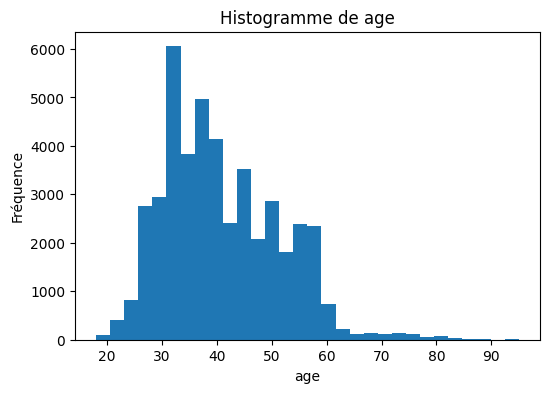

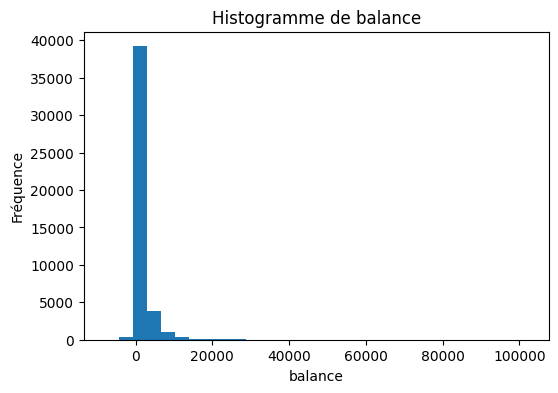

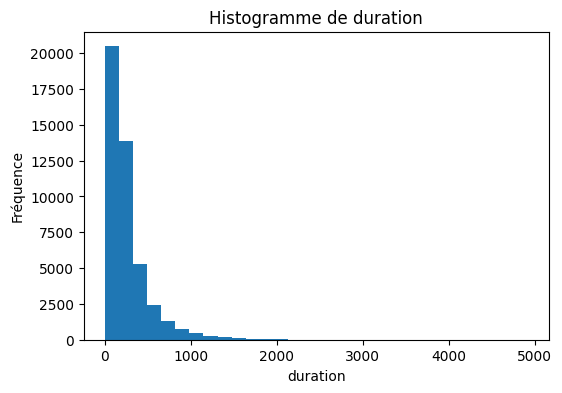

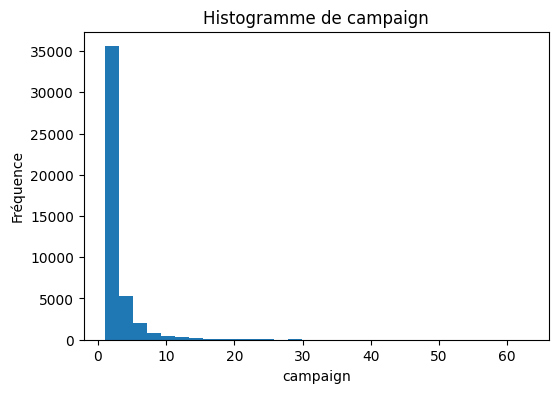

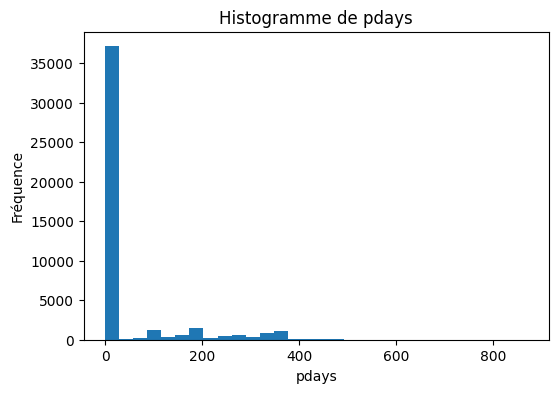

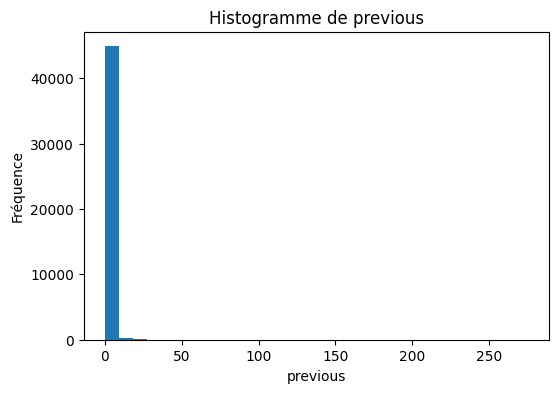

In [31]:
quant_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in quant_vars:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()


##**Visualisation du comportements des variables et valeurs abbérantes**

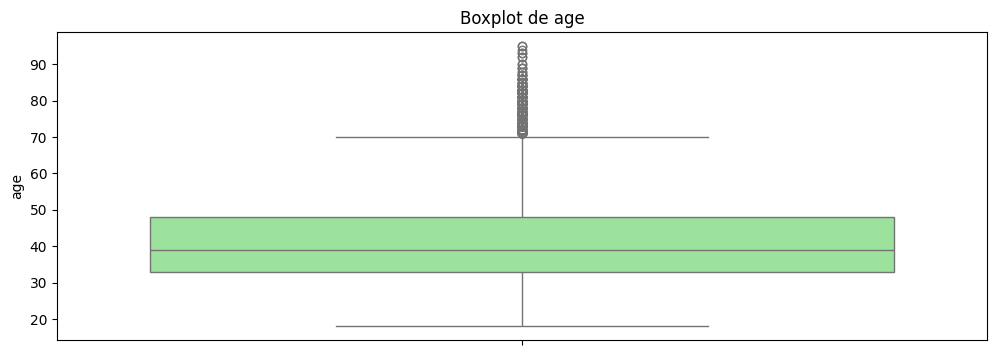

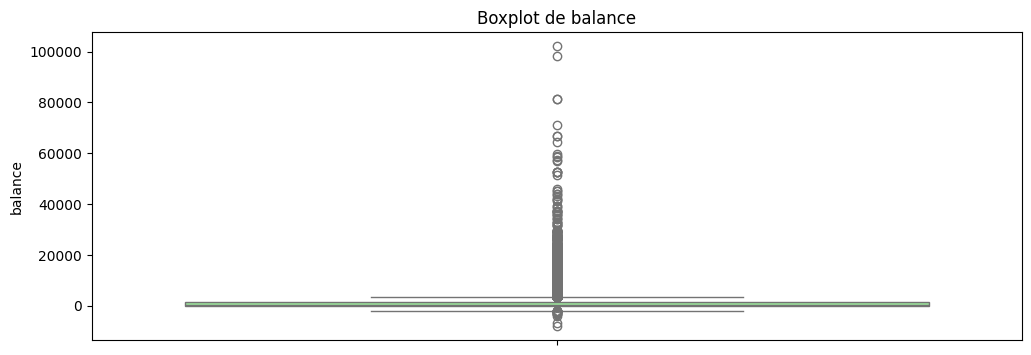

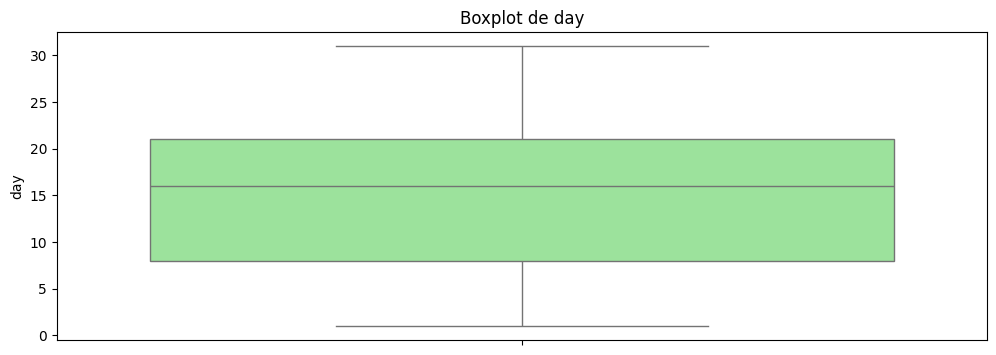

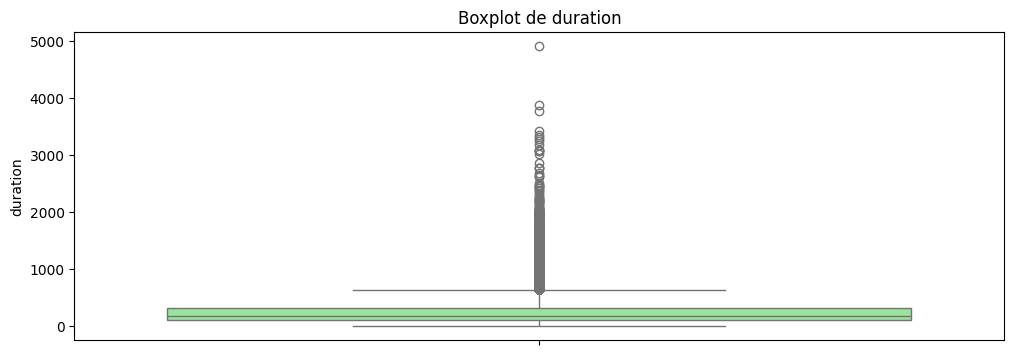

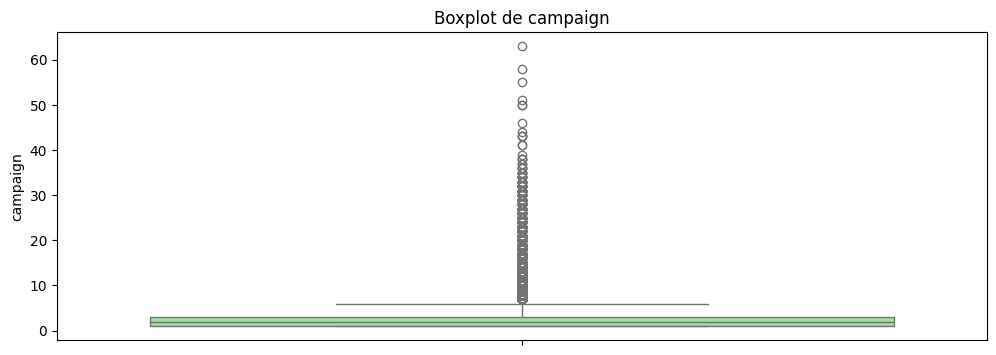

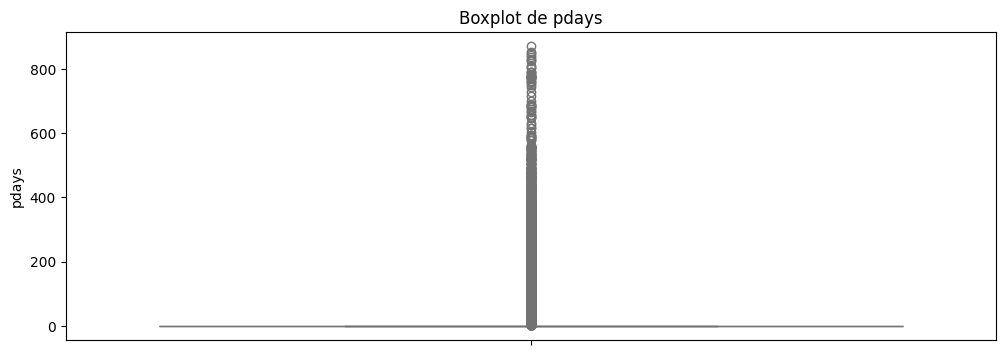

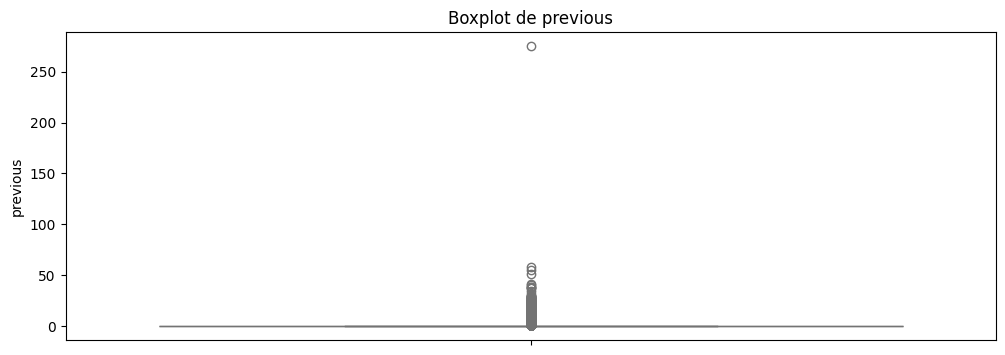

In [30]:
for col in quantivars:
    fig, ax = plt.subplots(1, figsize=(12,4))

    # Boxplot
    sns.boxplot(y=df[col], ax=ax, color='lightgreen')
    ax.set_title(f"Boxplot de {col}")
    plt.show()

Les visualisations montrent que certaines variables présentent des valeurs extrêmes marquées. Les boxplots mettent en évidence des outliers importants pour previous, balance, duration et pdays, indiquant que quelques clients ont été très souvent contactés ou disposent d’un solde très élevé.

Les graphes de densité et histogrammes confirment ces observations : les distributions de ces variables sont fortement asymétriques, avec des queues longues vers la droite. À l’inverse, des variables comme age et day sont relativement homogènes et symétriques.

**Analyse exploratoire des variables qualitative**

In [22]:
categorical_vars = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)


In [23]:
categorical_vars = df.select_dtypes(include='object').columns
print(categorical_vars)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [25]:
categorical_vars = df.select_dtypes(include='object').columns
for col in categorical_vars:
    print(f"\nDistribution de {col}:")
    print(df[col].value_counts())
    print("\nPourcentages :")
    print(df[col].value_counts(normalize=True) * 100)


Distribution de job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Pourcentages :
job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64

Distribution de marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Pourcentages :
marital
married     60.193316
single      28.289576
divorced    11.517109
Name: proportion, dtype: float64

Distribution de education:
education
secondary    23202
tertiary     

Les clients avec un succès dans les campagnes précédentes, contactés par cellulaire, et ayant des prêts ou un certain profil financier, sont des segments à prioriser pour maximiser le taux de souscription.

Certaines variables comme default sont peu fréquentes et peuvent avoir un impact limité dans la modélisation ou les recommandations.

Les périodes de contact (month) permettent d’optimiser le calendrier des campagnes.

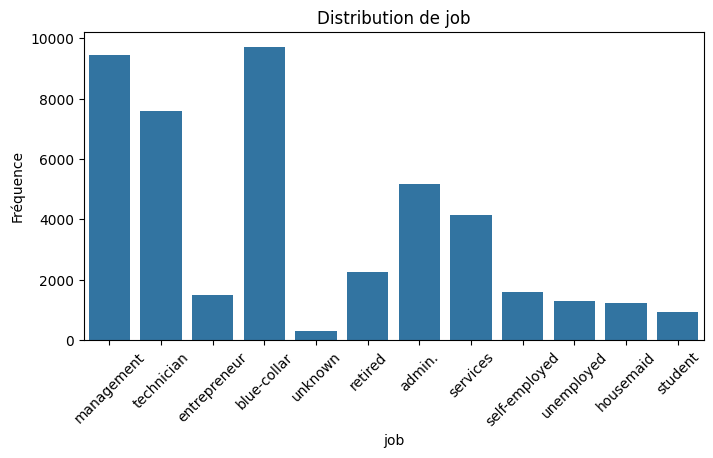

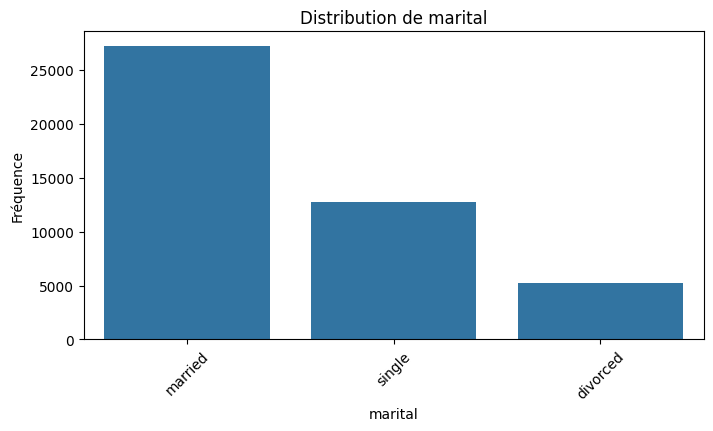

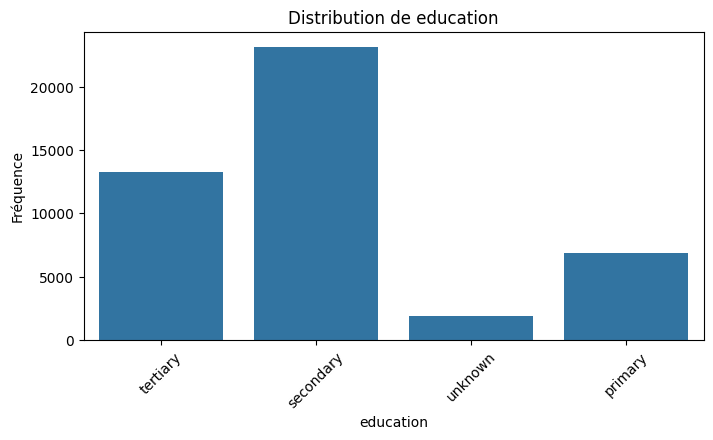

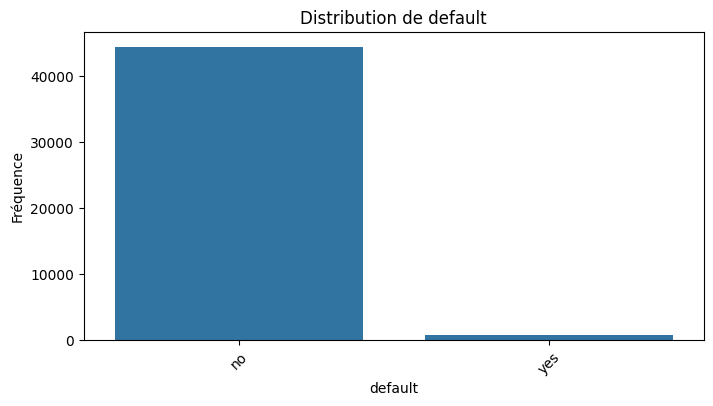

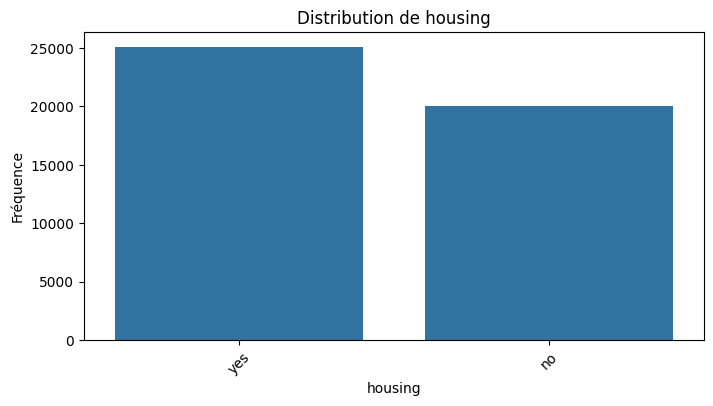

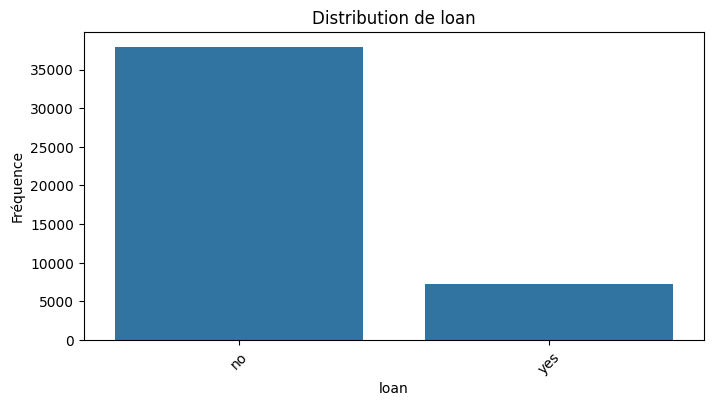

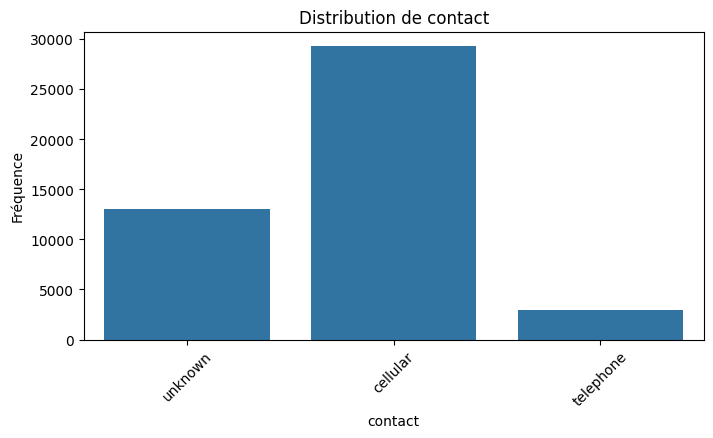

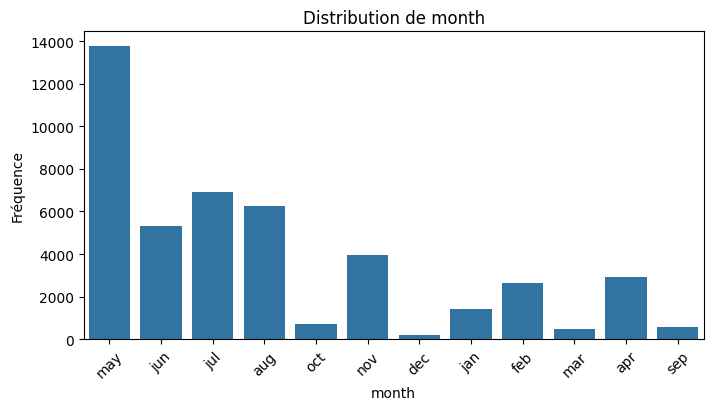

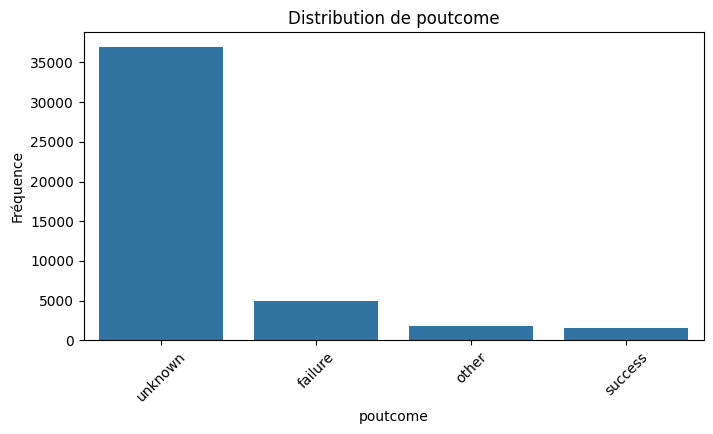

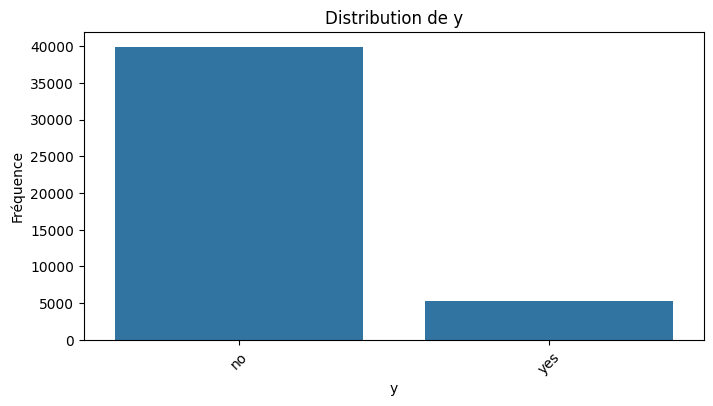

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Fréquence")
    plt.xlabel(col)
    plt.show()


##**Analyse bivariée et multivarié**

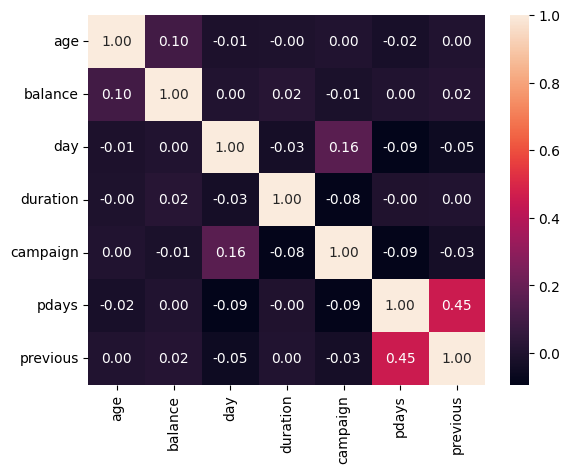

In [16]:
# Matrice de corrélation
corr = df[quantivars].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [ ]:
pd.crosstab(df['job'], df['y'], normalize='index')*100


y,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


La campagne devrait prioriser les retraités, étudiants et cadres (management) pour maximiser le taux de souscription.

Les métiers moins réceptifs peuvent être moins ciblés ou approchés différemment (offres personnalisées ou communication adaptée).

In [ ]:
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    print(f"\n{col} vs y:")
    print(pd.crosstab(df[col], df['y'], normalize='index')*100)



job vs y:
y                     no        yes
job                                
admin.         87.797331  12.202669
blue-collar    92.725031   7.274969
entrepreneur   91.728312   8.271688
housemaid      91.209677   8.790323
management     86.244449  13.755551
retired        77.208481  22.791519
self-employed  88.157061  11.842939
services       91.116996   8.883004
student        71.321962  28.678038
technician     88.943004  11.056996
unemployed     84.497314  15.502686
unknown        88.194444  11.805556

marital vs y:
y                no        yes
marital                       
divorced  88.054542  11.945458
married   89.876534  10.123466
single    85.050821  14.949179

education vs y:
y                 no        yes
education                      
primary    91.373522   8.626478
secondary  89.440565  10.559435
tertiary   84.993610  15.006390
unknown    86.429725  13.570275

default vs y:
y               no        yes
default                      
no       88.203892  11.796108
y

L’étude des variables qualitatives montre que certains segments de clients sont nettement plus réceptifs à l’offre :

Job (métier) : Les clients étudiants (≈29 %), retraités (≈23 %) et cadres (management, ≈14 %) sont les plus susceptibles de souscrire. Les métiers comme blue-collar (≈7 %) et housemaid (≈9 %) ont un taux de souscription faible.

Marital (situation matrimoniale) : Les célibataires (≈15 %) sont les plus réceptifs, suivis des divorcés (≈12 %) et mariés (≈10 %).

Education (niveau d’étude) : La souscription est plus élevée pour les clients tertiaires (≈15 %) et inconnus (≈14 %), et plus faible pour les niveaux primaire (≈9 %) et secondaire (≈11 %).

Default (défaut de paiement) : Les clients avec un défaut (yes) sont moins réceptifs (≈6 %) que ceux sans défaut (≈12 %).

Housing et Loan (prêts) : Les clients sans prêt immobilier (≈17 %) ou sans prêt personnel (≈13 %) sont plus réceptifs que ceux ayant un prêt.

Contact : Les contacts par cellulaire (≈15 %) et téléphone (≈13 %) sont plus efficaces que les contacts inconnus (≈4 %).

Month (mois du contact) : Les souscriptions sont très variables selon le mois, avec des pics en mars (≈52 %), décembre (≈47 %) et octobre (≈44 %) et des périodes moins favorables en mai (≈7 %), juillet (≈9 %) et juin (≈10 %).

Poutcome (résultat de la campagne précédente) : Les clients ayant un succès précédent (≈65 %) sont les plus réceptifs, tandis que les autres (failure, other, unknown) sont moins sensibles (<17 %).

Pour maximiser le taux de souscription, il est recommandé de prioriser les étudiants, retraités, cadres, célibataires et clients avec un succès précédent, de privilégier le contact par cellulaire et de planifier les campagnes sur les mois les plus favorables. Les clients avec défaut de paiement ou déjà très endettés peuvent être ciblés secondairement ou avec des offres adaptées.

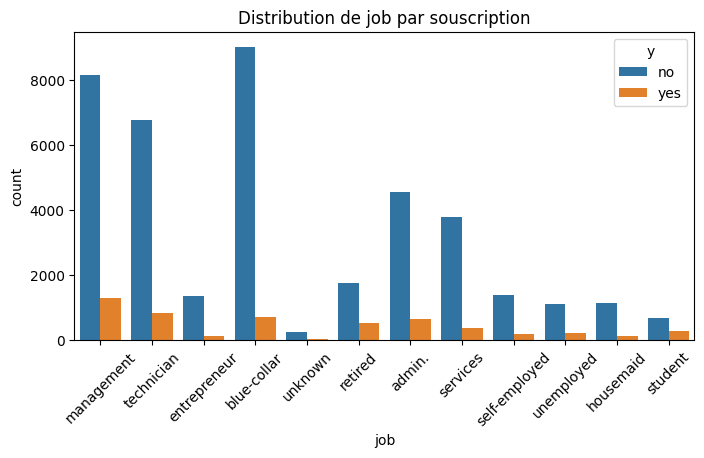

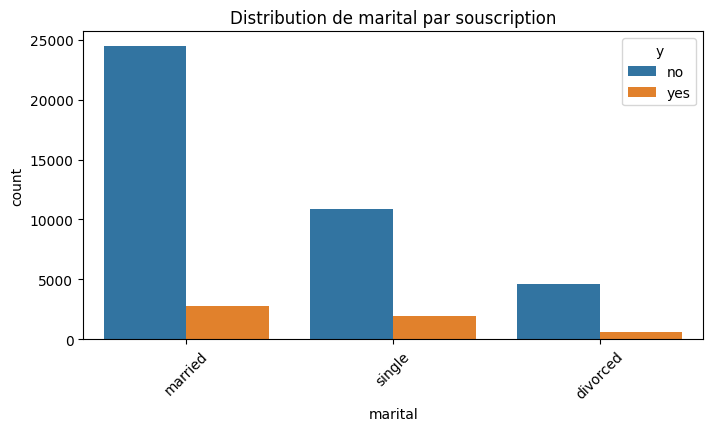

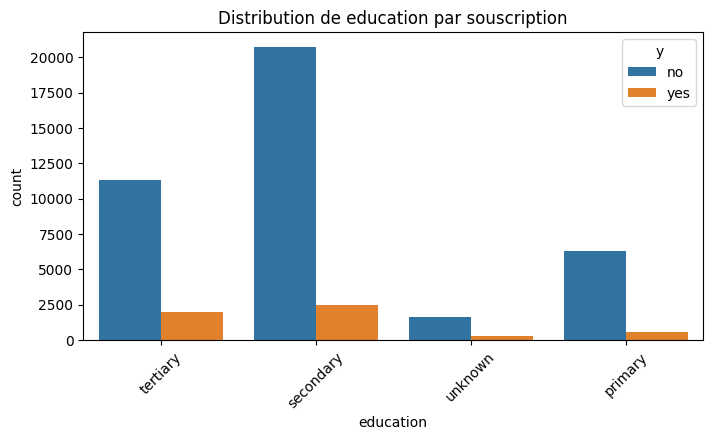

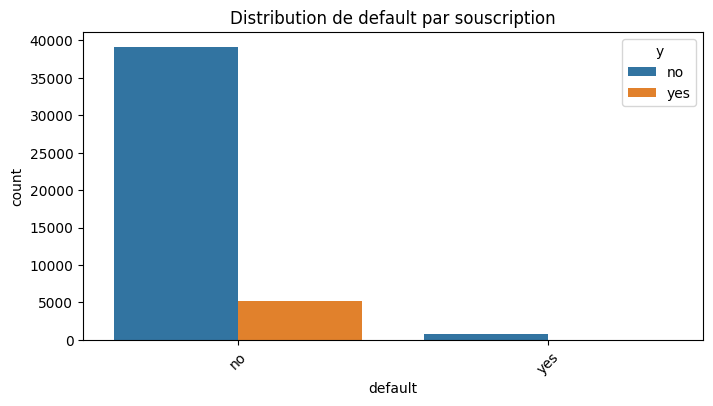

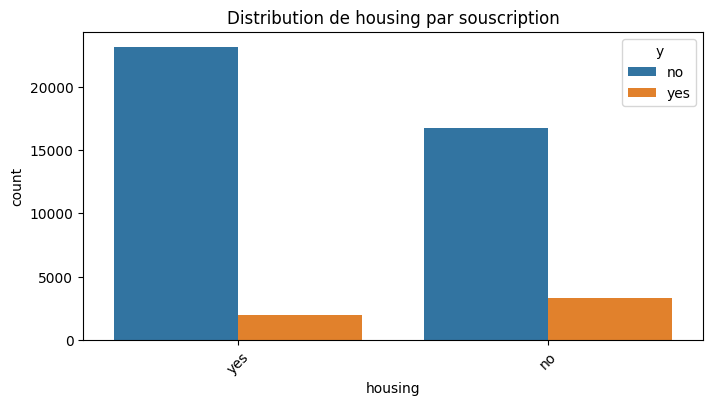

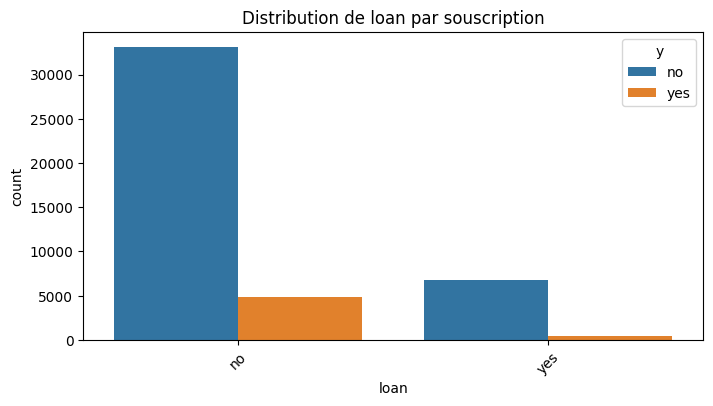

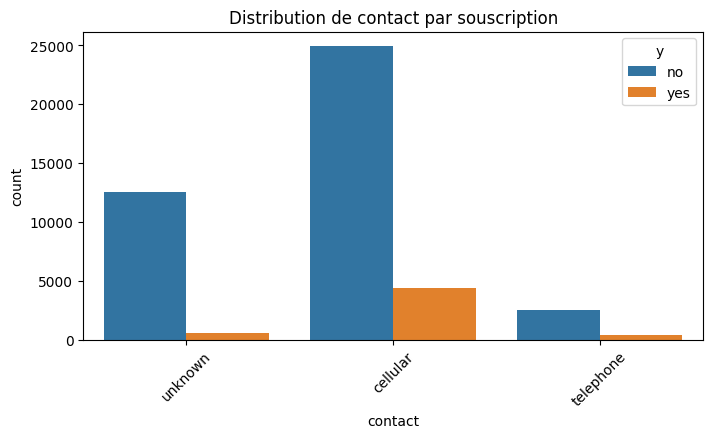

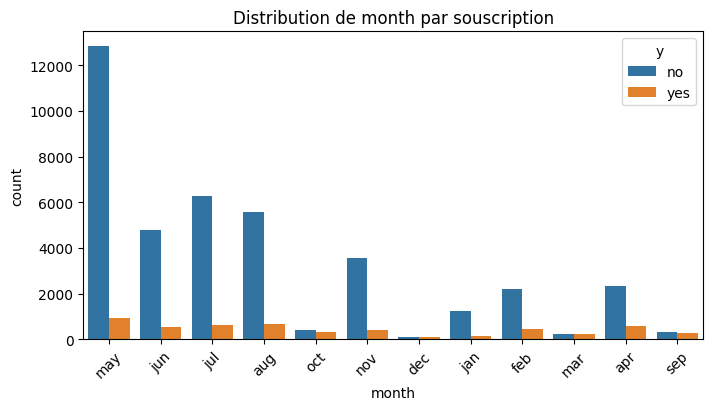

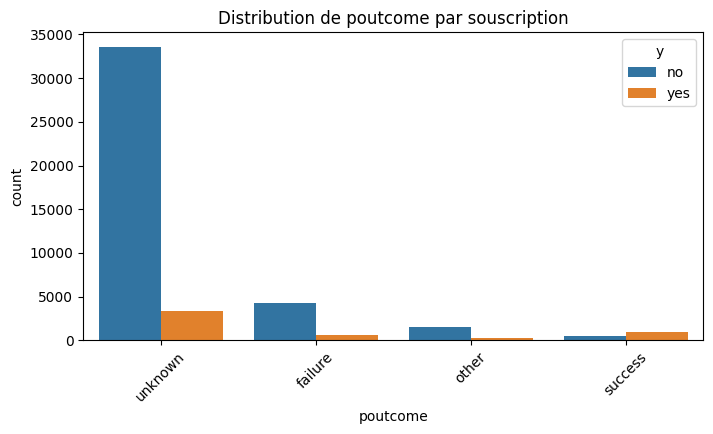

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f"Distribution de {col} par souscription")
    plt.xticks(rotation=45)
    plt.show()


Les graphiques confirment quels segments de clients cibler prioritairement pour maximiser le taux de souscription : étudiants, retraités, cadres, célibataires, clients sans défaut ou prêts, contactés par cellulaire et ayant un succès passé. Les campagnes peuvent être optimisées par mois et canal de contact pour améliorer le retour sur investissement.

###**Visualisation des relations entre deux variables**

a) Entre deux variables quantitatives

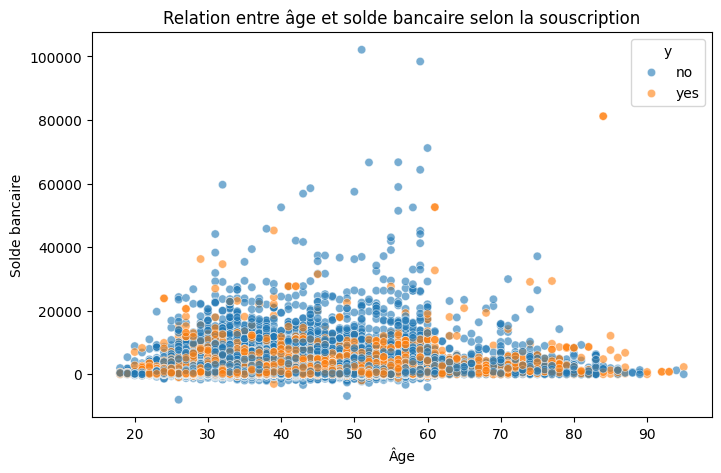

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='balance', hue='y', data=df, alpha=0.6)
plt.title('Relation entre âge et solde bancaire selon la souscription')
plt.xlabel('Âge')
plt.ylabel('Solde bancaire')
plt.show()


La plus grande concentration du solde bancaire se retrouve entre les clients agés de 25ans a 60ans

b) Entre une variable quantitative et une variable qualitative

/tmp/ipython-input-3054921920.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='job', y='balance', hue='y', data=df, ci=None)


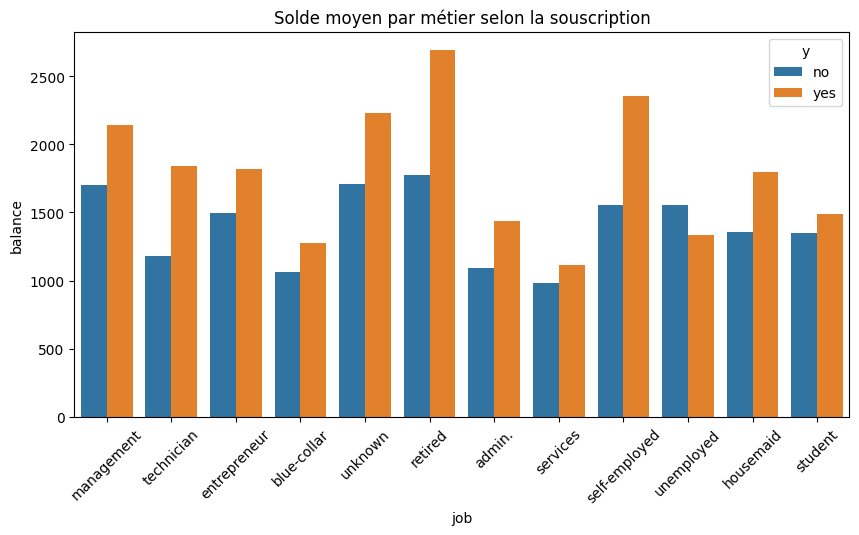

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='job', y='balance', hue='y', data=df, ci=None)
plt.title('Solde moyen par métier selon la souscription')
plt.xticks(rotation=45)
plt.show()


Le graphique met en évidence une forte hétérogénéité du solde bancaire (balance) selon la catégorie socioprofessionnelle. Les profils “management” et “retired” présentent en moyenne les soldes les plus élevés, ce qui peut s’expliquer par des revenus plus importants, une capacité d’épargne accrue ou, pour les retraités, une accumulation d’actifs sur le long terme.

À l’inverse, les catégories “blue-collar”, “services” et “housemaid” affichent des soldes moyens plus faibles, traduisant une capacité financière plus limitée. On observe également une dispersion importante des valeurs de balance dans presque toutes les catégories professionnelles, indiquant la présence d’outliers, notamment dans les groupes “management” et “self-employed”.

Globalement, ce graphique suggère que la variable job est associée au niveau de richesse financière des clients, et pourrait jouer un rôle explicatif pertinent dans l’analyse du comportement de souscription bancaire.

c) Entre deux variables qualitatives

In [ ]:
pd.crosstab(df['marital'], df['education'], normalize='index')*100


education,primary,secondary,tertiary,unknown
marital,,,,
divorced,14.442097,54.061840,28.250432,3.245631
married,19.276843,50.598956,25.861689,4.262512
single,6.669273,51.735731,37.466771,4.128225


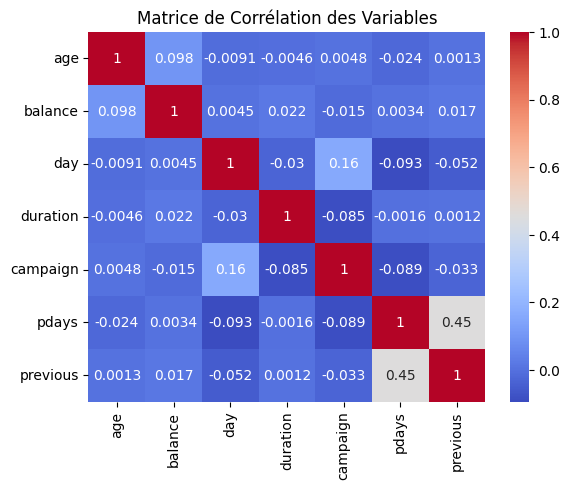

In [6]:

corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm") #RdYlGn  coolwarm
plt.title("Matrice de Corrélation des Variables")
plt.show()

##**Test ANOVA**

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_anova = ols('balance ~ y', data=df).fit()
anova_table = sm.stats.anova_lm(model_anova)

anova_table


,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,1.170151e+09,1.170151e+09,126.572276,2.521114e-29
Residual,45209.0,4.179536e+11,9.244921e+06,NaN,NaN


**Le test ANOVA confirme cette différence (F = 126.57, p-value < 0.05), indiquant que la balance moyenne diffère significativement selon la décision de souscription. La variable balance est donc un facteur explicatif pertinent du comportement de souscription.**\

###**Test ANCOVA**

In [20]:
model_ancova = ols('balance ~ y + age', data=df).fit()
ancova_table = sm.stats.anova_lm(model_ancova)

ancova_table


,df,sum_sq,mean_sq,F,PR(>F)
y,1.0,1.170151e+09,1.170151e+09,127.762167,1.386567e-29
age,1.0,3.901701e+09,3.901701e+09,426.004768,3.278125e-94
Residual,45208.0,4.140519e+11,9.158820e+06,NaN,NaN


Les résultats de l’ANCOVA montrent que la souscription à l’offre a un effet statistiquement significatif sur la variable étudiée, même après contrôle de l’âge (F = 127.76, p < 0.001). L’âge exerce également une influence significative (F = 426.00, p < 0.001), confirmant son rôle déterminant dans le comportement financier des clients. Ces résultats indiquent que les différences observées entre souscripteurs et non-souscripteurs ne s’expliquent pas uniquement par l’âge.

###**Test KHI-DEUX**

In [18]:
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(df['job'], df['y'])
chi2, p, dof, expected = chi2_contingency(cont_table)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")


Chi2 = 836.11, p-value = 0.0000


Le **test du khi-deux** met en évidence une association statistiquement très significative entre la variable étudiée et la souscription à l’offre de dépôt à terme (χ² = 836.11, p-value < 0.05). Ce résultat confirme que la variable considérée joue un rôle déterminant dans la décision des clients et doit être prise en compte dans la stratégie de ciblage marketing.

###**Test MANOVA**
Pour tester si la souscription influence plusieurs variables quantitatives simultanément (ex. balance, duration, campaign).

In [ ]:
from statsmodels.multivariate.manova import MANOVA

manova = MANOVA.from_formula(
    'balance + duration + campaign ~ y', data=df
)
print(manova.mv_test())


                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.3585 3.0000 45207.0000 26960.4268 0.0000
         Pillai's trace 0.6415 3.0000 45207.0000 26960.4268 0.0000
 Hotelling-Lawley trace 1.7891 3.0000 45207.0000 26960.4268 0.0000
    Roy's greatest root 1.7891 3.0000 45207.0000 26960.4268 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
            y            Value  Num DF   Den DF    F Value  Pr > F
------------------------------------------------------------------
           Wilks' lambda 0.8408 3.0000 45207.0000 2852.4576 0.0000
          Pillai

La MANOVA montre un effet global statistiquement significatif de la variable de souscription (y) sur l’ensemble des variables quantitatives analysées (balance, duration et campaign). Les statistiques multivariées (Wilks’ lambda = 0.8408, F = 2852.46, p-value < 0.05) confirment que les clients ayant souscrit à l’offre présentent un profil financier et comportemental significativement différent de ceux n’ayant pas souscrit.

Ces résultats indiquent que la décision de souscription ne dépend pas d’une seule caractéristique isolée, mais d’une combinaison de facteurs liés à l’épargne, à la durée des contacts et à l’intensité de la campagne marketing.

###**Test MANCOVA**
Contrôler l’effet de l’âge sur les relations observées.

In [ ]:
mancova = MANOVA.from_formula(
    'balance + duration + campaign ~ y + age', data=df
)
print(mancova.mv_test())


                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.8928 3.0000 45206.0000 1809.9521 0.0000
         Pillai's trace 0.1072 3.0000 45206.0000 1809.9521 0.0000
 Hotelling-Lawley trace 0.1201 3.0000 45206.0000 1809.9521 0.0000
    Roy's greatest root 0.1201 3.0000 45206.0000 1809.9521 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
           y            Value  Num DF   Den DF    F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.8408 3.0000 45206.0000 2852.3102 0.0000
         Pillai's trace 0.1592

Après avoir pris en compte l’âge des clients comme variable de contrôle, la MANCOVA montre que la souscription (y) conserve un effet statistiquement significatif sur l’ensemble des variables financières et comportementales analysées (balance, duration, campaign).

Les résultats multivariés (Wilks’ lambda = 0.8408, F = 2852.31, p-value < 0.05) indiquent que les différences observées entre souscripteurs et non-souscripteurs ne s’expliquent pas uniquement par l’âge, mais reflètent un profil client globalement différent.

En complément, l’âge a également un effet significatif (Wilks’ lambda = 0.9904, F = 146.59, p-value < 0.05), ce qui confirme qu’il influence partiellement les variables financières, mais que l’impact de la souscription reste prédominant.

#**4. Modélisation**

L’objectif de la modélisation est de prédire si un client acceptera ou non l’offre de dépôt à terme (y = yes/no), à partir de ses caractéristiques démographiques, financières et comportementales. Le choix du modèle KNN s’explique par sa simplicité et sa facilité d’interprétation, en adéquation avec l’objectif exploratoire du projet.


Les variables quantitatives ont été normalisées manuellement à l’aide de la méthode de standardisation (z-score), consistant à centrer les données par leur moyenne et à les réduire par leur écart-type. Cette étape est indispensable pour l’application du modèle KNN, fondé sur le calcul de distances.

####**Normalisation des variables qauntitatives**

In [7]:
df_norm = df.copy()

for col in quantivars:
    mean = df_norm[col].mean()
    std = df_norm[col].std()
    df_norm[col] = (df_norm[col] - mean) / std


In [8]:
df_norm[quantivars].agg(['mean', 'std'])


,age,balance,day,duration,campaign,pdays,previous
mean,2.061959e-16,1.760208e-17,4.149063e-17,6.160730e-17,3.520417e-17,8.046667e-17,-2.011667e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


La vérification de la normalisation montre que les variables quantitatives présentent des moyennes proches de zéro et des écarts-types égaux à un. Ces résultats confirment que la standardisation par la méthode z-score a été correctement appliquée, rendant les variables comparables pour le modèle KNN.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# X : variables quantitatives normalisées
X = df_norm[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

# y : variable cible (exemple : souscription au dépôt)
y = df['y']  # oui / non

# Séparation apprentissage / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Modèle KNN simple
knn = KNeighborsClassifier(n_neighbors=5)

# Entraînement
knn.fit(X_train, y_train)

# Prédictions
y_pred = knn.predict(X_test)


#**5. Evaluation du modèle**



In [14]:
# Evaluation du modèle
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

# Matrice de confusion
cm=confusion_matrix(y_test, y_pred)

import pandas as pd

cm_df = pd.DataFrame(
    cm,
    index=['Réel NO', 'Réel YES'],
    columns=['Prédit NO', 'Prédit YES']
)

cm_df


Accuracy : 0.8845473311707461


,Prédit NO,Prédit YES
Réel NO,11530,436
Réel YES,1130,468


**Interpretation**

Accuracy = 88,45 %
Le modèle prédit correctement près de 9 clients sur 10.


**Matrice de confuision:**


*   Vrais négatifs (11530)

Clients correctement identifiés comme non souscripteurs.
*   Faux positifs (436)

Clients ciblés par erreur causant un coût marketing inutile.



*   Faux négatifs (1130)


Clients qui auraient souscrit mais non détectés et de ce fait entraine des  opportunités manquées.
*   Vrais positifs (468)


Clients correctement identifiés comme souscripteurs.


**Commentaires**

Le modèle KNN atteint une accuracy de 88,45 %, indiquant une bonne performance globale. La matrice de confusion montre que le modèle identifie efficacement les clients non souscripteurs, limitant ainsi les coûts marketing. En revanche, un nombre non négligeable de faux négatifs subsiste, traduisant des opportunités commerciales manquées. Ces résultats suggèrent que le modèle est particulièrement adapté à une stratégie de ciblage prudente, tout en laissant une marge d’amélioration pour capter davantage de clients susceptibles de souscrire.

In [12]:
# Rapport de classification
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.91      0.96      0.94     11966
         yes       0.52      0.29      0.37      1598

    accuracy                           0.88     13564
   macro avg       0.71      0.63      0.66     13564
weighted avg       0.86      0.88      0.87     13564



##**Présentation des résultats et recommandations**

Le rapport de classification met en évidence une performance contrastée du modèle KNN selon les classes. Pour la classe no (non-souscripteurs), le modèle présente une précision de 91 % et un recall de 96 %, indiquant qu’il identifie correctement la grande majorité des clients ne souhaitant pas souscrire à l’offre. Le F1-score élevé (94 %) confirme l’excellente performance du modèle sur cette classe majoritaire.

En revanche, pour la classe yes (souscripteurs), la précision atteint 52 %, ce qui signifie qu’environ un client ciblé sur deux souscrit effectivement à l’offre. Le recall est plus faible (29 %), montrant que le modèle ne détecte qu’une partie limitée des clients réellement susceptibles de souscrire. Le F1-score de 37 % reflète ce compromis entre une précision acceptable et un rappel insuffisant.

L’accuracy globale du modèle s’élève à 88 %, mais cette valeur doit être interprétée avec prudence en raison du déséquilibre des classes, la majorité des observations appartenant à la classe no. Les moyennes macro, qui attribuent le même poids à chaque classe, mettent davantage en évidence cette asymétrie des performances, tandis que les moyennes pondérées sont dominées par la classe majoritaire.

Ces résultats montrent que le modèle KNN est particulièrement efficace pour limiter les coûts marketing en excluant les clients non intéressés, mais qu’il génère encore un nombre important de faux négatifs, correspondant à des opportunités commerciales manquées. Le modèle constitue ainsi un outil pertinent pour une stratégie de ciblage prudente, tout en laissant une marge d’amélioration pour capter davantage de souscripteurs potentiels.

##**Recommandations stratégiques : segments à cibler en priorité**

À partir des analyses descriptives, statistiques et du modèle KNN, plusieurs segments de clients peuvent être priorisés :

Les étudiants, retraités et cadres (management), qui présentent des taux de souscription nettement supérieurs à la moyenne.

Les clients ayant un résultat positif lors d’une campagne précédente (poutcome = success), qui constituent le segment le plus réceptif.

Les clients disposant d’un solde bancaire élevé et sans défaut de paiement, indiquant une capacité financière plus favorable.

Les clients contactés par cellulaire, canal qui s’est révélé plus efficace que les autres.

Les périodes de contact stratégiques, notamment les mois de mars, octobre et décembre, durant lesquels les taux de souscription sont les plus élevés.

Ces segments devraient être ciblés en priorité afin d’optimiser l’efficacité des campagnes marketing

##**Scénarios alternatifs pour maximiser le retour sur investissement (ROI)**

Plusieurs scénarios peuvent être envisagés en fonction des contraintes et objectifs de la banque :

Scénario prudent (réduction des coûts)
Utiliser le modèle KNN principalement pour exclure les clients ayant une faible probabilité de souscription. Cette approche limite les coûts marketing, mais accepte un niveau plus élevé d’opportunités manquées.

Scénario orienté croissance (maximisation des souscriptions)
Accepter davantage de faux positifs afin d’augmenter le recall sur la classe yes. Ce scénario vise à capter un plus grand nombre de souscripteurs potentiels, au prix d’un coût marketing plus élevé.

Scénario hybride
Combiner le modèle KNN avec des règles métier simples (par exemple, cibler prioritairement les clients ayant un succès passé ou appartenant à des segments socio-professionnels réceptifs). Cette stratégie permet de trouver un compromis entre maîtrise des coûts et augmentation des souscriptions.